In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data 
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.shape,test.shape

((23856, 18), (15903, 17))

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [5]:
train.describe()


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [6]:
test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


In [7]:
#missing %age of the values 
def missing_percentage(train,test):
    for col in train.columns.values:
        print("missing values in {} is {}%".format(col,(train[col].isna().sum()/train.shape[0])))
    
    #test missing percentage
    for col in test.columns.values:
        print("missing values in {} is {}%".format(col,(test[col].isna().sum()/test.shape[0])))
        
missing_percentage(train,test)



#filling na in X_12 with arbitrary values
train["X_12"]=train["X_12"].fillna(99)
test["X_12"]=test["X_12"].fillna(99)


#changing the dates into datetime
train["DATE"]=pd.to_datetime(train["DATE"])
test["DATE"]=pd.to_datetime(test["DATE"])


missing values in INCIDENT_ID is 0.0%
missing values in DATE is 0.0%
missing values in X_1 is 0.0%
missing values in X_2 is 0.0%
missing values in X_3 is 0.0%
missing values in X_4 is 0.0%
missing values in X_5 is 0.0%
missing values in X_6 is 0.0%
missing values in X_7 is 0.0%
missing values in X_8 is 0.0%
missing values in X_9 is 0.0%
missing values in X_10 is 0.0%
missing values in X_11 is 0.0%
missing values in X_12 is 0.007629107981220657%
missing values in X_13 is 0.0%
missing values in X_14 is 0.0%
missing values in X_15 is 0.0%
missing values in MULTIPLE_OFFENSE is 0.0%
missing values in INCIDENT_ID is 0.0%
missing values in DATE is 0.0%
missing values in X_1 is 0.0%
missing values in X_2 is 0.0%
missing values in X_3 is 0.0%
missing values in X_4 is 0.0%
missing values in X_5 is 0.0%
missing values in X_6 is 0.0%
missing values in X_7 is 0.0%
missing values in X_8 is 0.0%
missing values in X_9 is 0.0%
missing values in X_10 is 0.0%
missing values in X_11 is 0.0%
missing values

In [8]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,2018-02-01,0,30,35,7,3,6,4,0,5,1,174,99.0,72,119,23
1,CR_103520,2004-03-05,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,2018-01-27,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,2006-08-18,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,2011-10-31,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


# Explanatory data analysis

In [9]:
train.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

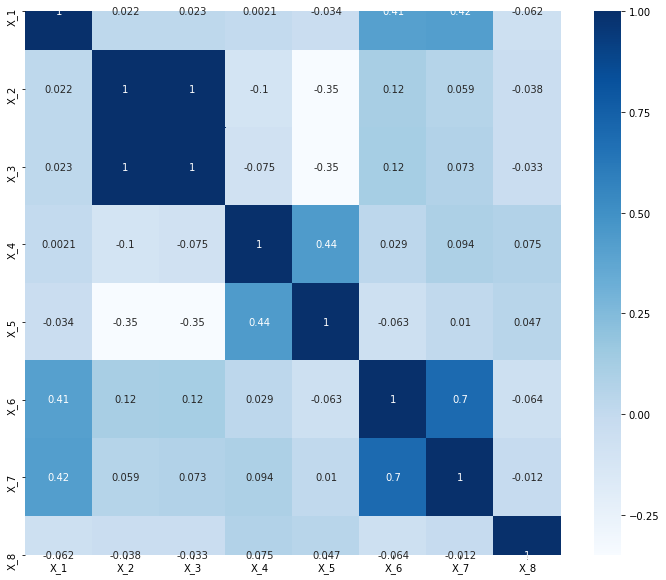

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(train[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7','X_8']].corr(),annot=True,cmap='Blues')

0 is 0.04476861167002012% and 1 is 0.9552313883299799% in the data


Text(0.5, 1.0, 'target column values distribution')

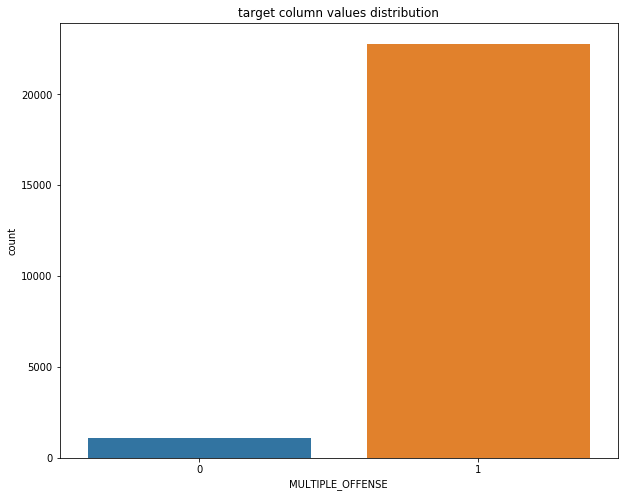

In [11]:
print("0 is {}% and 1 is {}% in the data".format((train["MULTIPLE_OFFENSE"].value_counts()[0]/train["MULTIPLE_OFFENSE"].shape[0]),
                                                  (train["MULTIPLE_OFFENSE"].value_counts()[1]/train["MULTIPLE_OFFENSE"].shape[0])))
#checking the target distribution
plt.figure(figsize=(10,8))
sns.countplot(train["MULTIPLE_OFFENSE"])
plt.title("target column values distribution")

<Figure size 432x288 with 0 Axes>

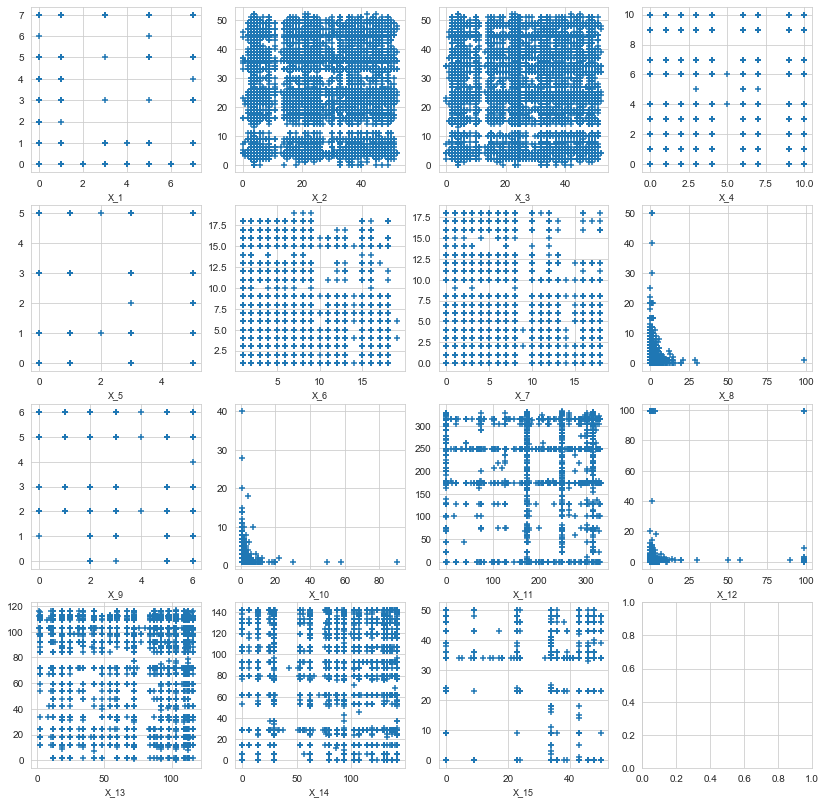

In [12]:
#checking the type of similarity in dataset train and test
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
        
    plt.show();
    
feat=['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15']
plot_feature_scatter(train[:15903],test[:15903],feat)

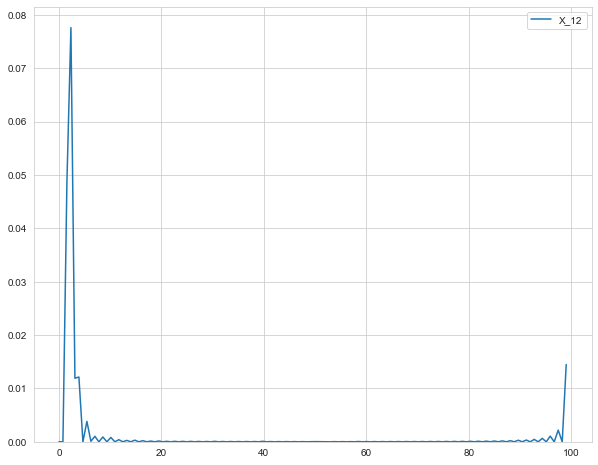

In [13]:
plt.figure(figsize=(10,8))
# sns.countplot(train["X_12"])
sns.kdeplot(train["X_12"])

In [14]:
for col in train.columns.values:
    print("unique values in {} are {}".format(col,len(train[col].unique())))

unique values in INCIDENT_ID are 23856
unique values in DATE are 9121
unique values in X_1 are 8
unique values in X_2 are 52
unique values in X_3 are 52
unique values in X_4 are 10
unique values in X_5 are 5
unique values in X_6 are 19
unique values in X_7 are 19
unique values in X_8 are 24
unique values in X_9 are 7
unique values in X_10 are 24
unique values in X_11 are 133
unique values in X_12 are 24
unique values in X_13 are 60
unique values in X_14 are 62
unique values in X_15 are 28
unique values in MULTIPLE_OFFENSE are 2


In [15]:
train.corr()
#x15,14,11,10,8,3,2

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.021999,0.022603,0.002137,-0.034220,0.409876,0.421454,-0.061897,0.017984,0.004155,-0.003078,0.014870,0.111611,-0.012708,-0.012132,0.014034
X_2,0.021999,1.000000,0.996985,-0.104321,-0.349190,0.119718,0.058806,-0.038174,-0.017749,-0.016710,0.038003,-0.010374,0.046668,0.015194,0.013822,-0.027293
X_3,0.022603,0.996985,1.000000,-0.075344,-0.347519,0.124662,0.072954,-0.033035,-0.019853,-0.014485,0.036946,-0.014040,0.043201,0.013522,0.006851,-0.027218
X_4,0.002137,-0.104321,-0.075344,1.000000,0.439616,0.028929,0.094076,0.075197,-0.008453,0.038077,-0.037614,-0.002466,-0.051861,-0.030024,-0.033198,-0.002921
X_5,-0.034220,-0.349190,-0.347519,0.439616,1.000000,-0.062784,0.010161,0.046926,0.046428,0.046212,-0.043111,-0.002055,-0.071233,-0.003413,-0.036383,-0.003450
X_6,0.409876,0.119718,0.124662,0.028929,-0.062784,1.000000,0.695243,-0.063541,0.079192,0.021186,-0.002990,-0.018837,0.047845,-0.013155,-0.006621,-0.007903
X_7,0.421454,0.058806,0.072954,0.094076,0.010161,0.695243,1.000000,-0.011824,0.011519,0.023205,0.002970,-0.014015,0.012204,0.003738,-0.003277,-0.008036
X_8,-0.061897,-0.038174,-0.033035,0.075197,0.046926,-0.063541,-0.011824,1.000000,-0.090184,0.222004,0.009424,0.018147,-0.048140,0.003987,0.017636,-0.033397
X_9,0.017984,-0.017749,-0.019853,-0.008453,0.046428,0.079192,0.011519,-0.090184,1.000000,0.013388,-0.006152,-0.000423,0.023537,-0.297295,0.006475,-0.000748
X_10,0.004155,-0.016710,-0.014485,0.038077,0.046212,0.021186,0.023205,0.222004,0.013388,1.000000,-0.045596,0.100851,0.002332,-0.016519,-0.003336,-0.242596


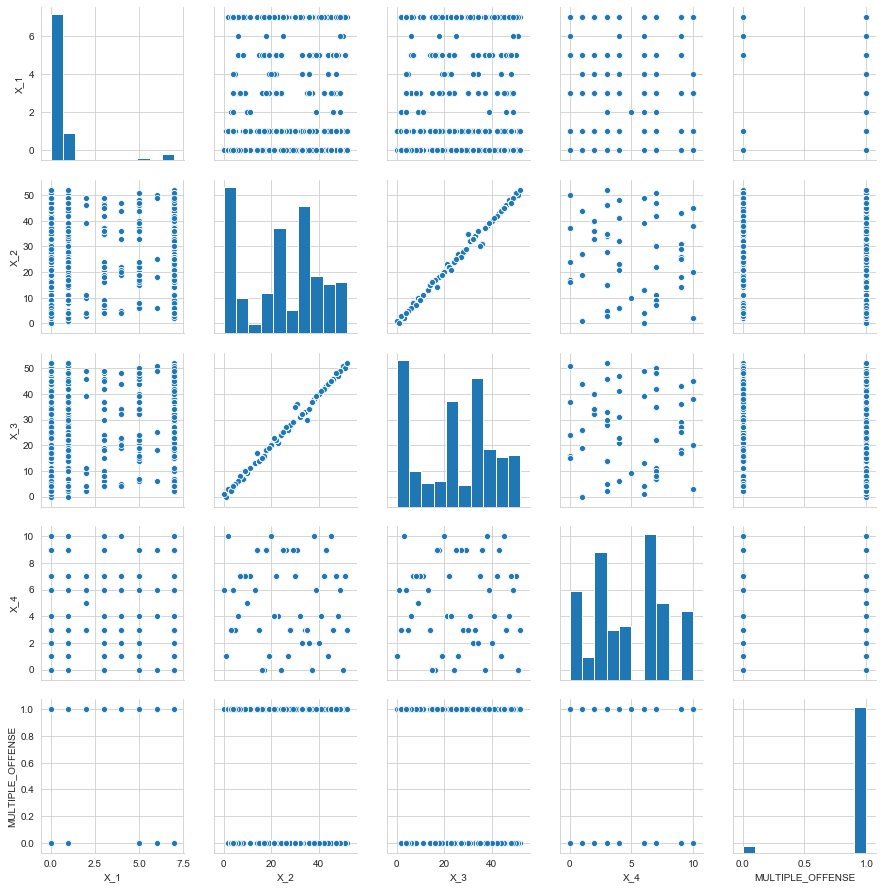

In [16]:
sns.pairplot(train[['X_1', 'X_2', 'X_3', 'X_4',"MULTIPLE_OFFENSE"]])

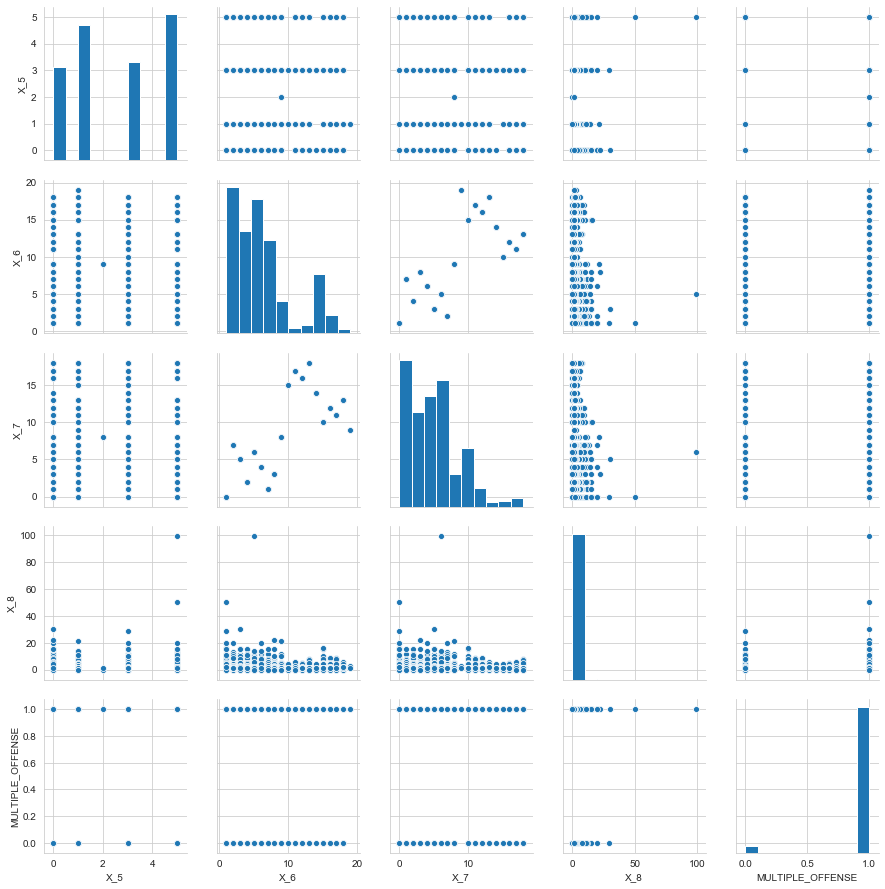

In [17]:
sns.pairplot(train[['X_5', 'X_6', 'X_7', 'X_8',"MULTIPLE_OFFENSE"]])

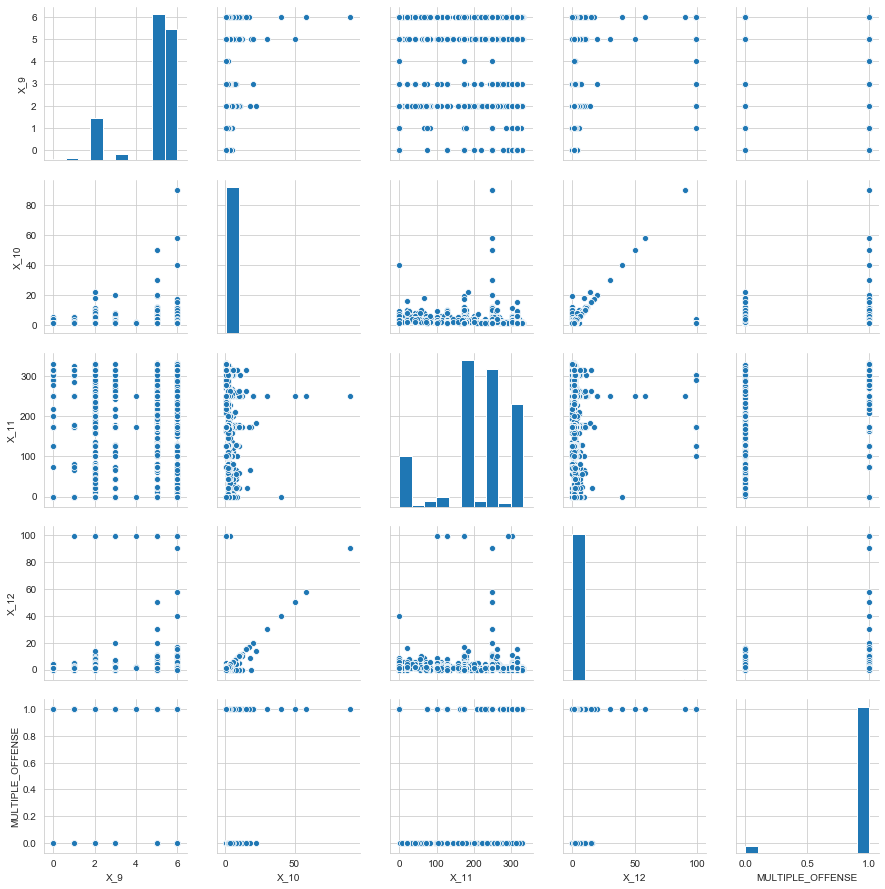

In [18]:
sns.pairplot(train[['X_9', 'X_10', 'X_11', 'X_12',"MULTIPLE_OFFENSE"]])

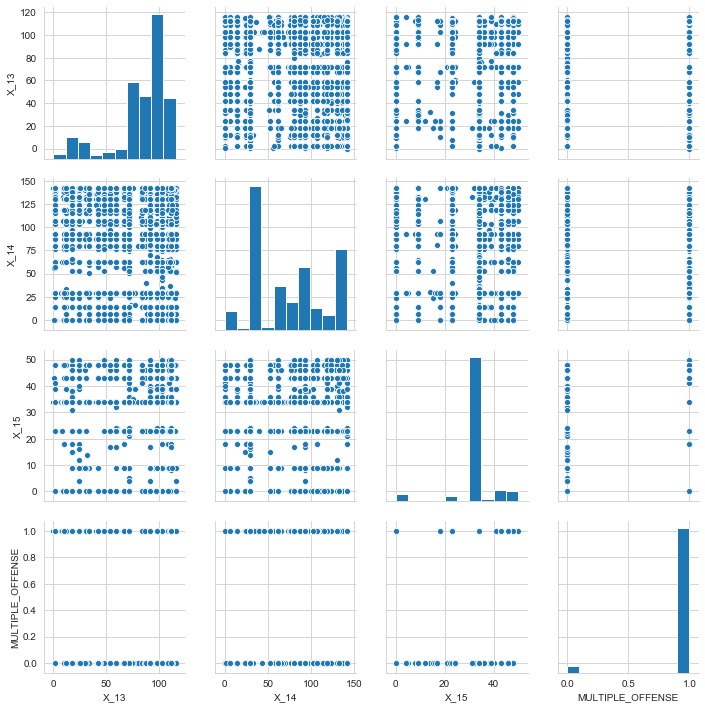

In [19]:
sns.pairplot(train[['X_13', 'X_14', 'X_15', "MULTIPLE_OFFENSE"]])

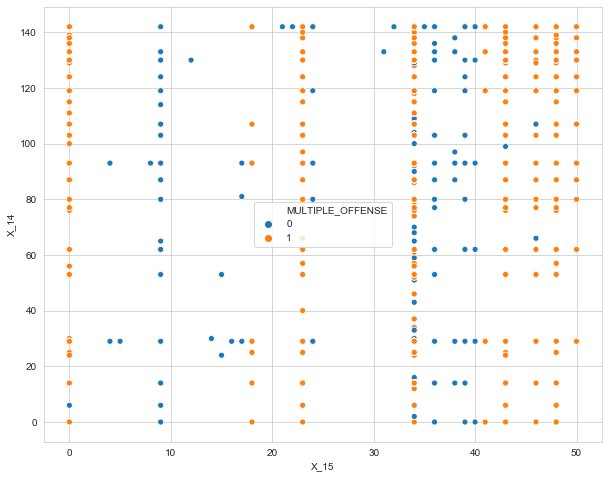

In [20]:
##x15,14,11,10,8,3,2
train_target_0=train[train["MULTIPLE_OFFENSE"]==0]
plt.figure(figsize=(10,8))
sns.scatterplot(x=train["X_15"],y=train["X_14"],hue=train["MULTIPLE_OFFENSE"])


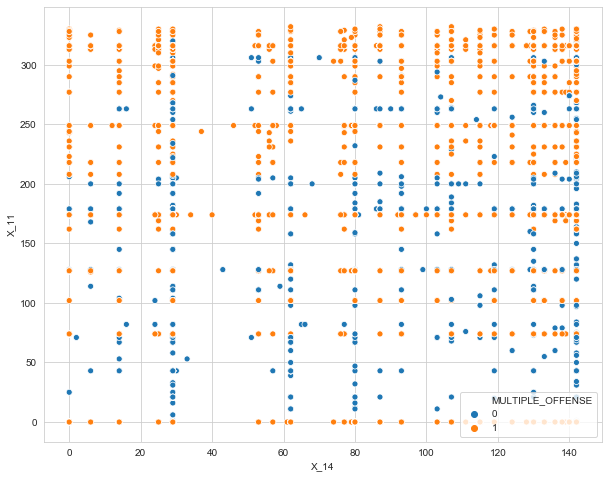

In [21]:
#x15,14,11,10,8,3,2
# train_target_0=train[train["MULTIPLE_OFFENSE"]==0]
# a=pd.crosstab(train["X_2"],train["MULTIPLE_OFFENSE"])
# print(a)
# print(len(train["X_2"].unique()))
plt.figure(figsize=(10,8))
sns.scatterplot(x=train["X_14"],y=train["X_11"],hue=train["MULTIPLE_OFFENSE"])


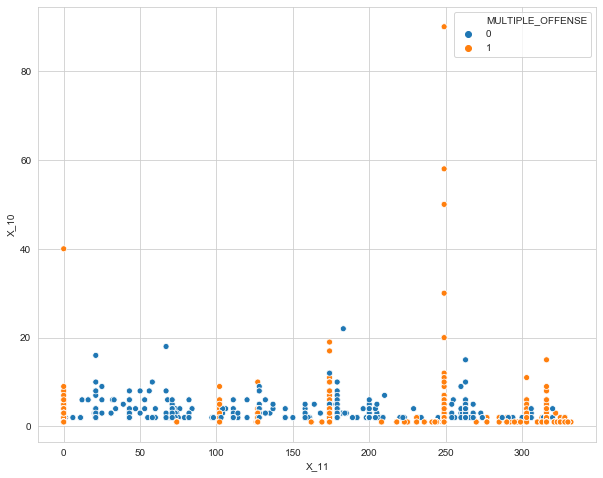

In [22]:
##x15,14,11,10,8,3,2
#train_target_0=train[train["MULTIPLE_OFFENSE"]==0]
plt.figure(figsize=(10,8))
sns.scatterplot(x=train["X_11"],y=train["X_10"],hue=train["MULTIPLE_OFFENSE"])


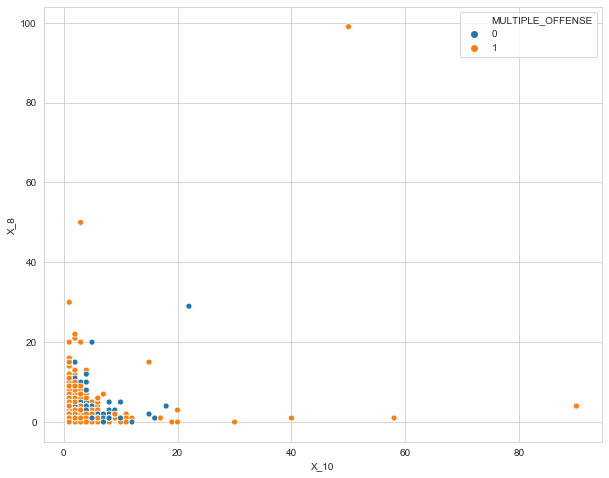

In [23]:
##x15,14,11,10,8,3,2
#train_target_0=train[train["MULTIPLE_OFFENSE"]==0]
plt.figure(figsize=(10,8))
sns.scatterplot(x=train["X_10"],y=train["X_8"],hue=train["MULTIPLE_OFFENSE"])


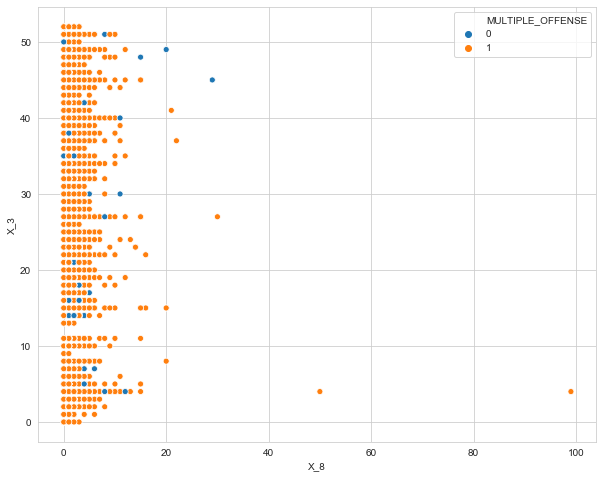

In [24]:
##x15,14,11,10,8,3,2
#train_target_0=train[train["MULTIPLE_OFFENSE"]==0]
plt.figure(figsize=(10,8))
sns.scatterplot(x=train["X_8"],y=train["X_3"],hue=train["MULTIPLE_OFFENSE"])


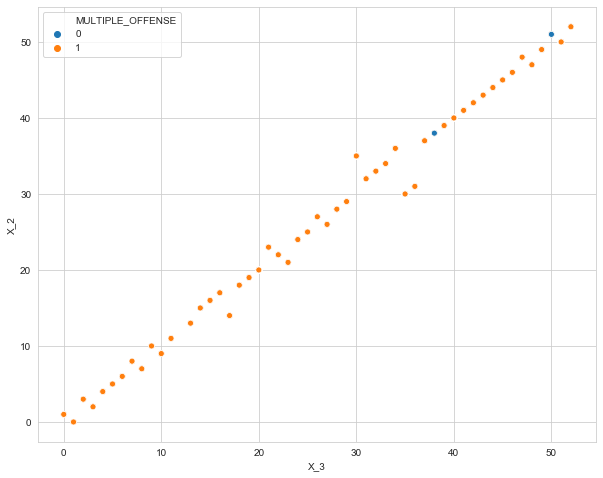

In [25]:
##x15,14,11,10,8,3,2
#train_target_0=train[train["MULTIPLE_OFFENSE"]==0]
plt.figure(figsize=(10,8))
sns.scatterplot(x=train["X_3"],y=train["X_2"],hue=train["MULTIPLE_OFFENSE"])


{'whiskers': [<matplotlib.lines.Line2D at 0x369dbc1508>,
 'caps': [<matplotlib.lines.Line2D at 0x369dbc1d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x369ca6db88>,
 'medians': [<matplotlib.lines.Line2D at 0x369dbc7cc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x369dbcbb48>,
 'means': []}

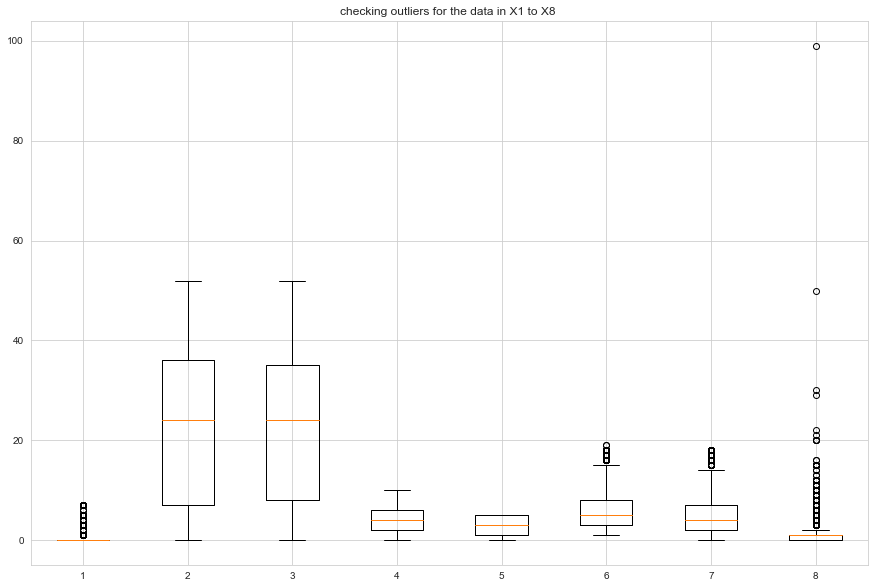

In [26]:
plt.figure(figsize=(15,10))
plt.title("checking outliers for the data in X1 to X8 ")
plt.boxplot([train["X_1"],train["X_2"],train["X_3"],train["X_4"],train["X_5"],
             train["X_6"],train["X_7"],train["X_8"]])

{'whiskers': [<matplotlib.lines.Line2D at 0x369dcccf48>,
 'caps': [<matplotlib.lines.Line2D at 0x369dccff08>,
 'boxes': [<matplotlib.lines.Line2D at 0x369dccc6c8>,
 'medians': [<matplotlib.lines.Line2D at 0x369dcd5a08>,
 'fliers': [<matplotlib.lines.Line2D at 0x369dcd9a08>,
 'means': []}

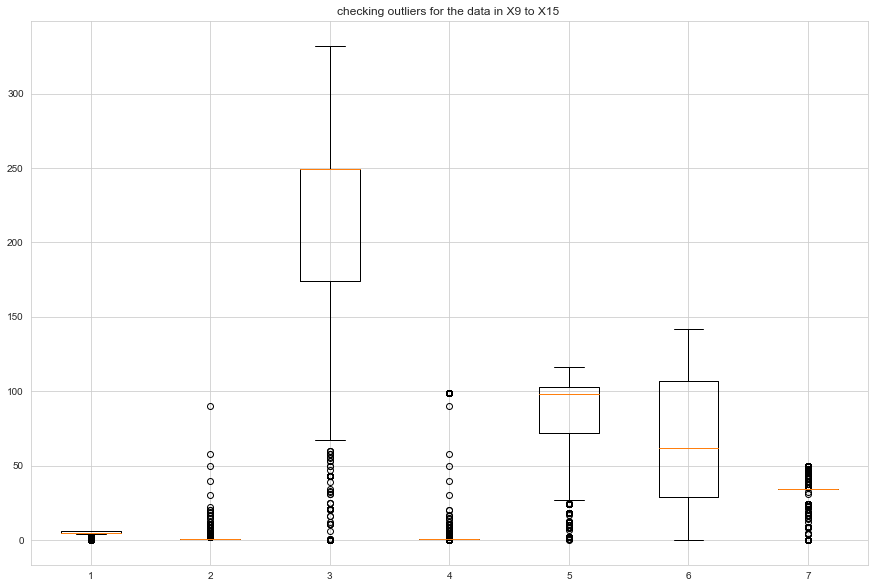

In [27]:
plt.figure(figsize=(15,10))
plt.title("checking outliers for the data in X9 to X15 ")
plt.boxplot([train["X_9"],
             train["X_10"],train["X_11"],train["X_12"],train["X_13"],
             train["X_14"],train["X_15"]])

In [28]:
# xx=["a","b","c","d"]
# if("a" in xx):
#     print("True")
#     xx.remove("a")
#     print(xx)
# else:
#     print("False")

(23854, 18)


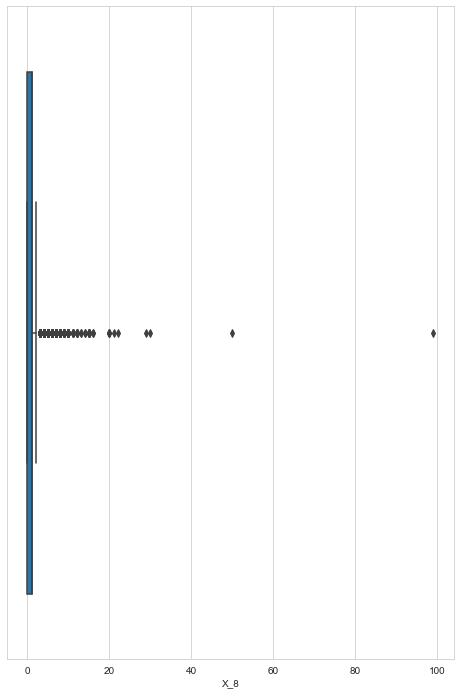

In [29]:
plt.figure(figsize=(8,12))
print(train[train["X_8"]<40].shape)
sns.boxplot(train["X_8"])

In [30]:
def drop_max_range_outliers(data,features,distance):
    q1=data[features].quantile(.25)
    q3=data[features].quantile(.75)
    iqr=q3-q1
    lower_limit,upper_limit=(q1-(iqr*distance)),(q3+(iqr*distance))
    return lower_limit,upper_limit

# train_cpy=train.copy()
# lower_range,upper_range=drop_max_range_outliers(train_cpy,"X_8",6.0)

# print(lower_range,upper_range)
# print(len(train_cpy[train_cpy["X_8"]<lower_range])+len(train_cpy[train_cpy["X_8"]>upper_range]))
# train_cpy=train_cpy[(train_cpy["X_8"]>lower_range) & (train_cpy["X_8"]<upper_range)]
# train_cpy.shape

In [31]:
train_cpy=train.copy()
#manually removing the most different 
train_cpy=train_cpy[train_cpy["X_8"]<40]
train_cpy.shape


(23854, 18)

In [34]:
train_cpy.to_csv("C://Users//umairansari//Desktop//cleaned_data.csv",index=False)